In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Acquisition

In [2]:
# Download and Load Dataset
import sys
sys.path.append('..')

from data.download_data import download_dataset, load_dataset

# Download if not exists, then load
df = load_dataset()
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (303, 14)


In [3]:
# Display first few rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
# Dataset Information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nNumber of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Target column: 'target'")
print("\n" + "=" * 60)
df.info()

DATASET INFORMATION

Number of samples: 303
Number of features: 13
Target column: 'target'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
# Statistical Summary
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.44,9.04,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.16,0.96,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.69,17.60,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.69,51.78,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.99,0.99,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.61,22.88,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


### Feature Description

| Feature | Description |
|---------|-------------|
| age | Age in years |
| sex | Sex (1 = male, 0 = female) |
| cp | Chest pain type (0-3) |
| trestbps | Resting blood pressure (mm Hg) |
| chol | Serum cholesterol (mg/dl) |
| fbs | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) |
| restecg | Resting ECG results (0-2) |
| thalach | Maximum heart rate achieved |
| exang | Exercise induced angina (1 = yes, 0 = no) |
| oldpeak | ST depression induced by exercise |
| slope | Slope of peak exercise ST segment (0-2) |
| ca | Number of major vessels colored by fluoroscopy (0-3) |
| thal | Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect) |
| target | Heart disease (0 = no, 1 = yes) |

## 2. Data Cleaning & Preprocessing

In [6]:
# Check for Missing Values
print("Missing Values Analysis")
print("=" * 40)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("\n✓ No missing values found!")
else:
    print(f"\nTotal missing values: {missing.sum()}")

Missing Values Analysis
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found!


In [7]:
# Handle Missing Values (if any)
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  - {col}: filled with median ({median_val})")
    
    print("\n✓ Missing values handled!")
else:
    print("No missing values to handle.")

No missing values to handle.


In [8]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Number of duplicate rows: 0


In [9]:
# Check Data Types and Convert if necessary
print("Data Types:")
print(df.dtypes)

# Ensure categorical columns are properly typed
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('Int64')  # Nullable integer

Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


## 3. Exploratory Data Analysis

### 3.1 Target Variable Distribution (Class Balance)

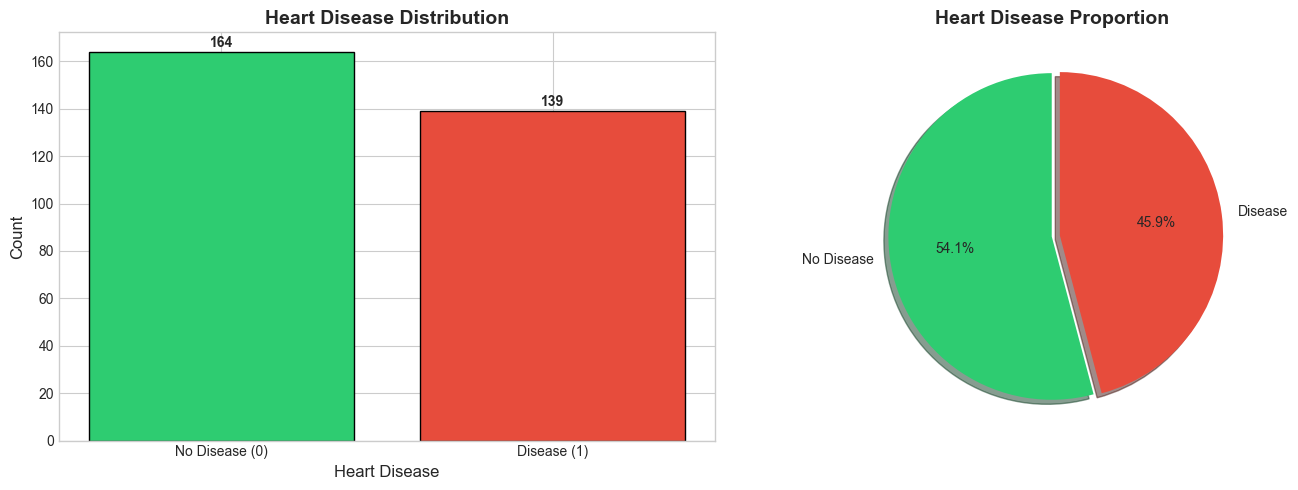


Class Balance:
  No Disease (0): 164 (54.1%)
  Disease (1): 139 (45.9%)


In [10]:
# Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['target'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(target_counts.index, target_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Heart Disease', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Disease (0)', 'Disease (1)'])

# Add value labels
for i, v in enumerate(target_counts.values):
    axes[0].text(target_counts.index[i], v + 2, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['No Disease', 'Disease'], 
            autopct='%1.1f%%', colors=colors, explode=[0, 0.05],
            shadow=True, startangle=90)
axes[1].set_title('Heart Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nClass Balance:")
print(f"  No Disease (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"  Disease (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

### 3.2 Feature Distributions (Histograms)

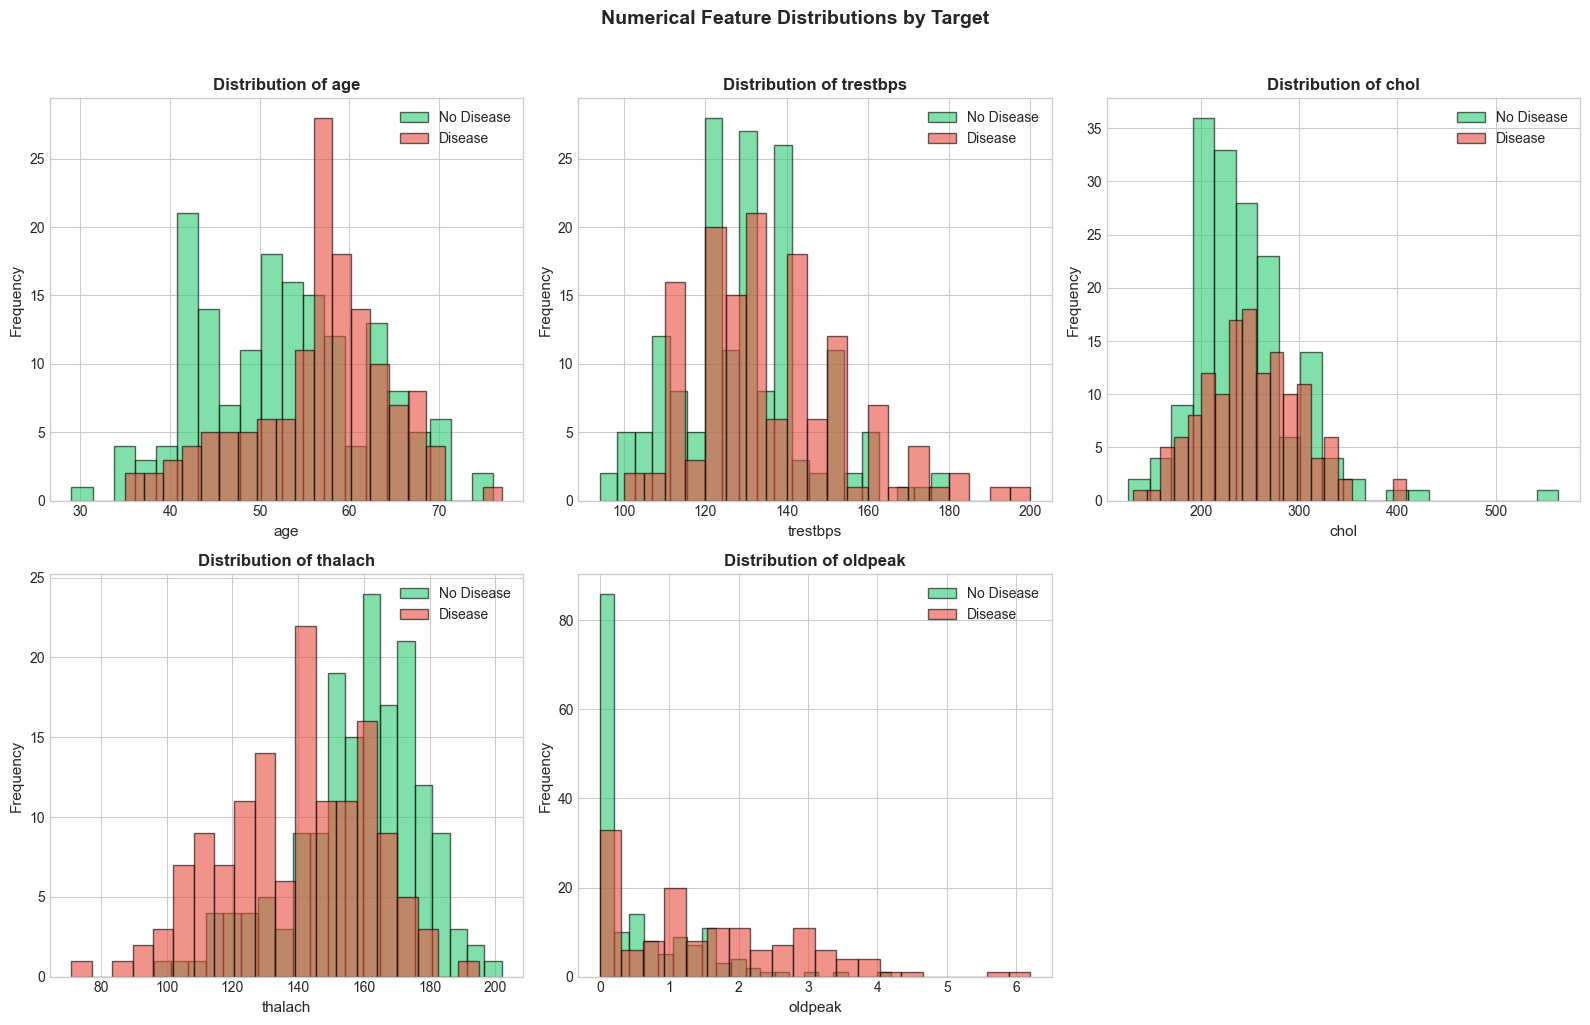

In [11]:
# Histograms for Numerical Features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    ax = axes[i]
    
    # Plot histogram with KDE
    for target_val, color, label in [(0, '#2ecc71', 'No Disease'), (1, '#e74c3c', 'Disease')]:
        data = df[df['target'] == target_val][col]
        ax.hist(data, bins=20, alpha=0.6, color=color, label=label, edgecolor='black')
    
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.legend()

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.suptitle('Numerical Feature Distributions by Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

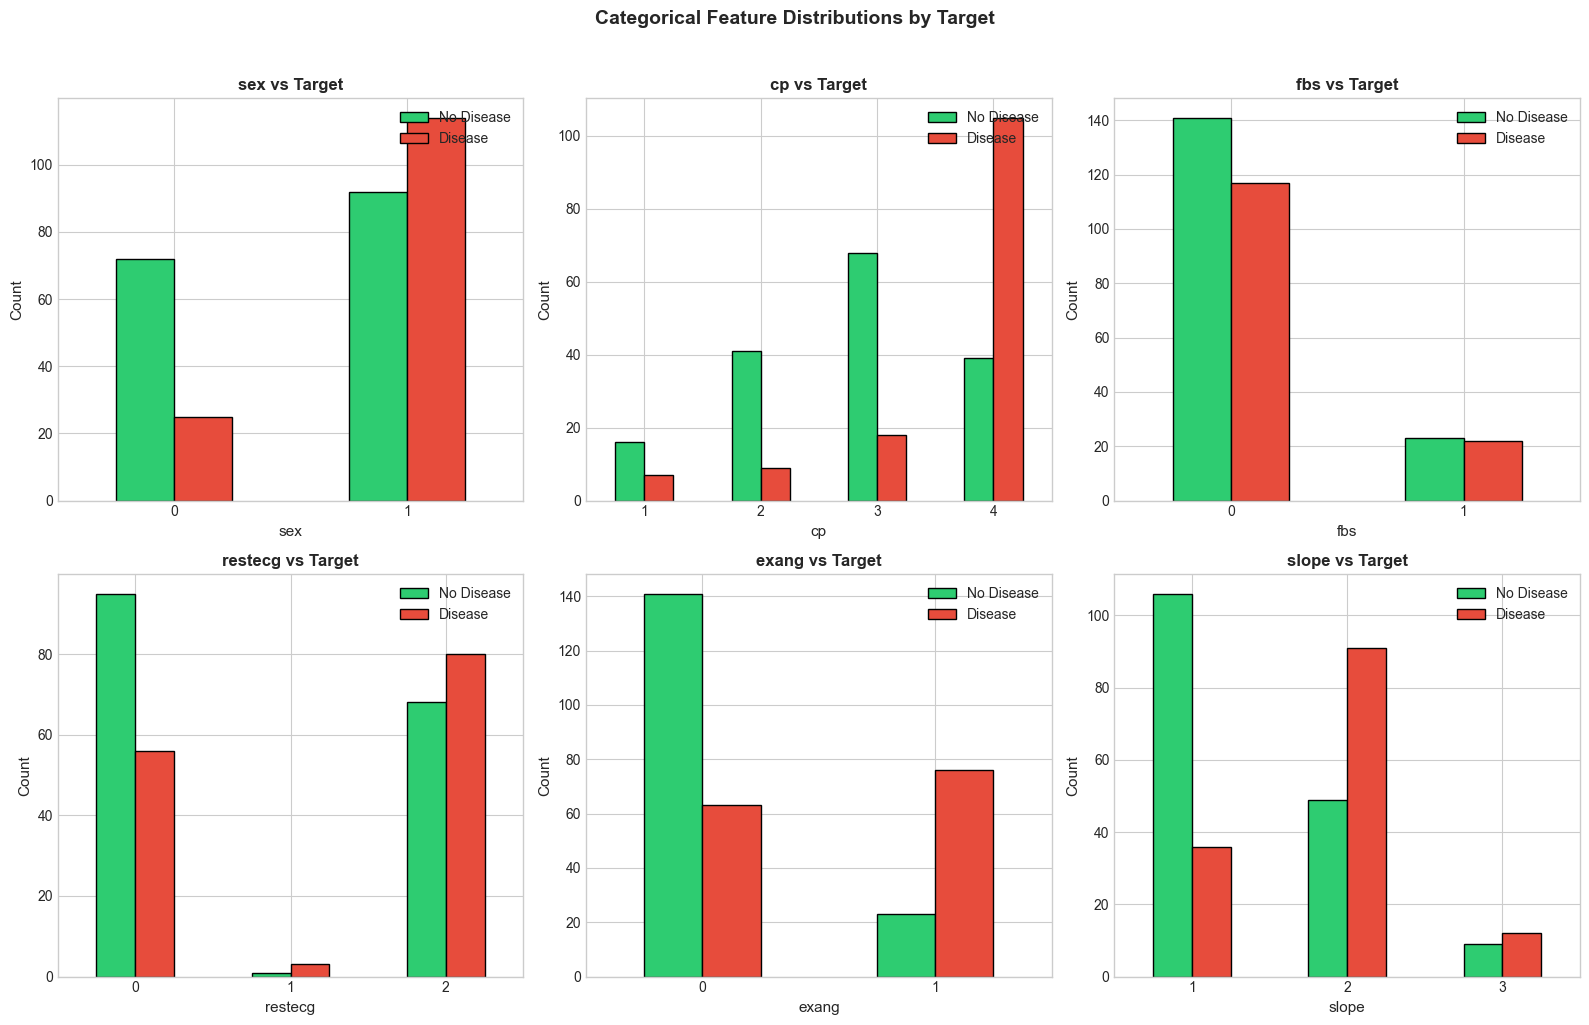

In [12]:
# Categorical Features Distribution
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax = axes[i]
    
    # Create cross-tabulation
    ct = pd.crosstab(df[col], df['target'])
    ct.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black')
    
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title(f'{col} vs Target', fontsize=12, fontweight='bold')
    ax.legend(['No Disease', 'Disease'], loc='upper right')
    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Categorical Feature Distributions by Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/categorical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.3 Correlation Analysis

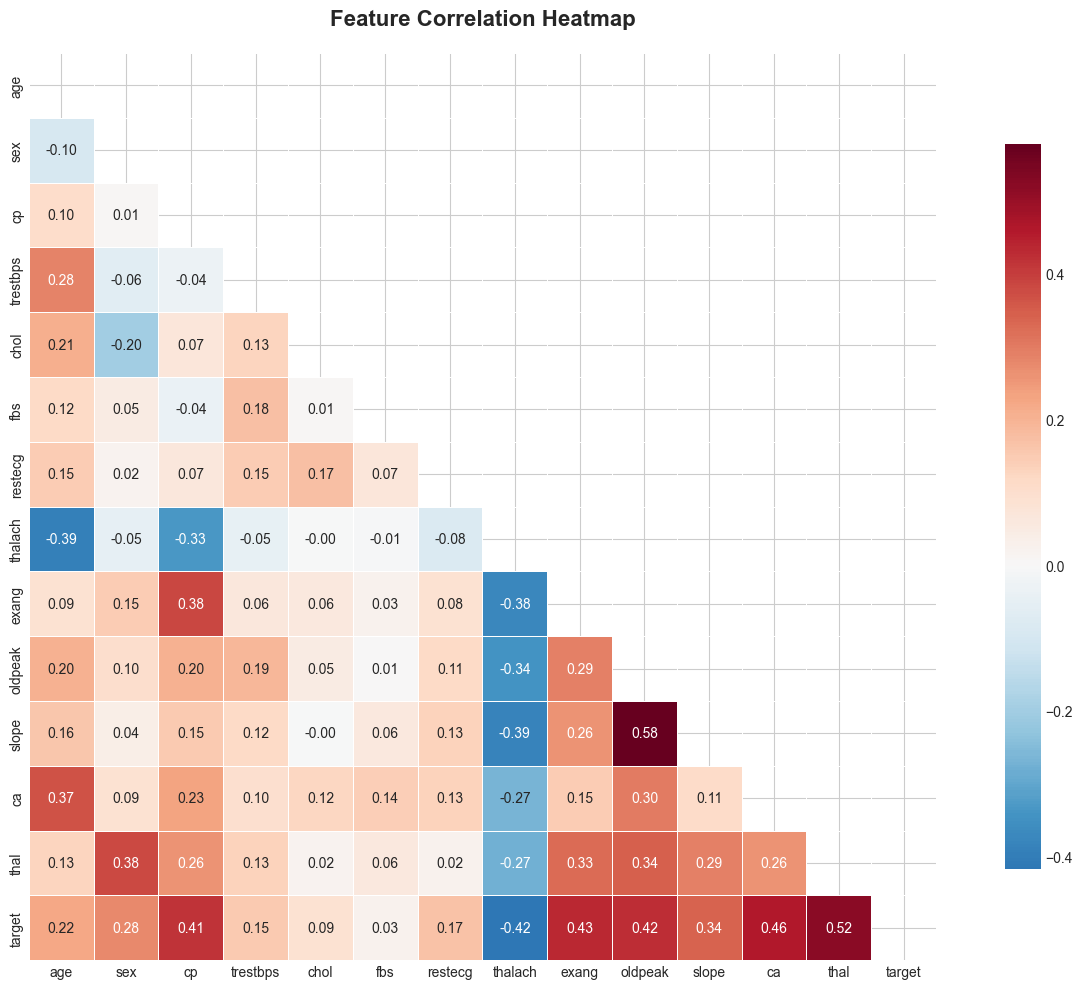


Correlation with Target:
thal        0.522
ca          0.460
exang       0.432
oldpeak     0.425
cp          0.414
slope       0.339
sex         0.277
age         0.223
restecg     0.169
trestbps    0.151
chol        0.085
fbs         0.025
thalach    -0.417
Name: target, dtype: float64


In [13]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))

# Compute correlation matrix
corr_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, linewidths=0.5,
            square=True, cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../screenshots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Show correlations with target
print("\nCorrelation with Target:")
print("=" * 40)
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)
print(target_corr.round(3))

In [17]:
# Interactive Correlation with Target (Plotly)
target_corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation': target_corr.values
})

fig = px.bar(target_corr_df, x='Correlation', y='Feature', orientation='h',
             color='Correlation', color_continuous_scale='RdBu_r',
             title='Feature Correlation with Heart Disease Target')
fig.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})

# Use 'browser' renderer as fallback if notebook renderer fails
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
try:
    fig.show()
except:
    # Fallback: save as HTML and display link
    fig.write_html('../screenshots/correlation_interactive.html')
    print("Interactive plot saved to '../screenshots/correlation_interactive.html'")

Interactive plot saved to '../screenshots/correlation_interactive.html'


### 3.4 Box Plots for Outlier Detection

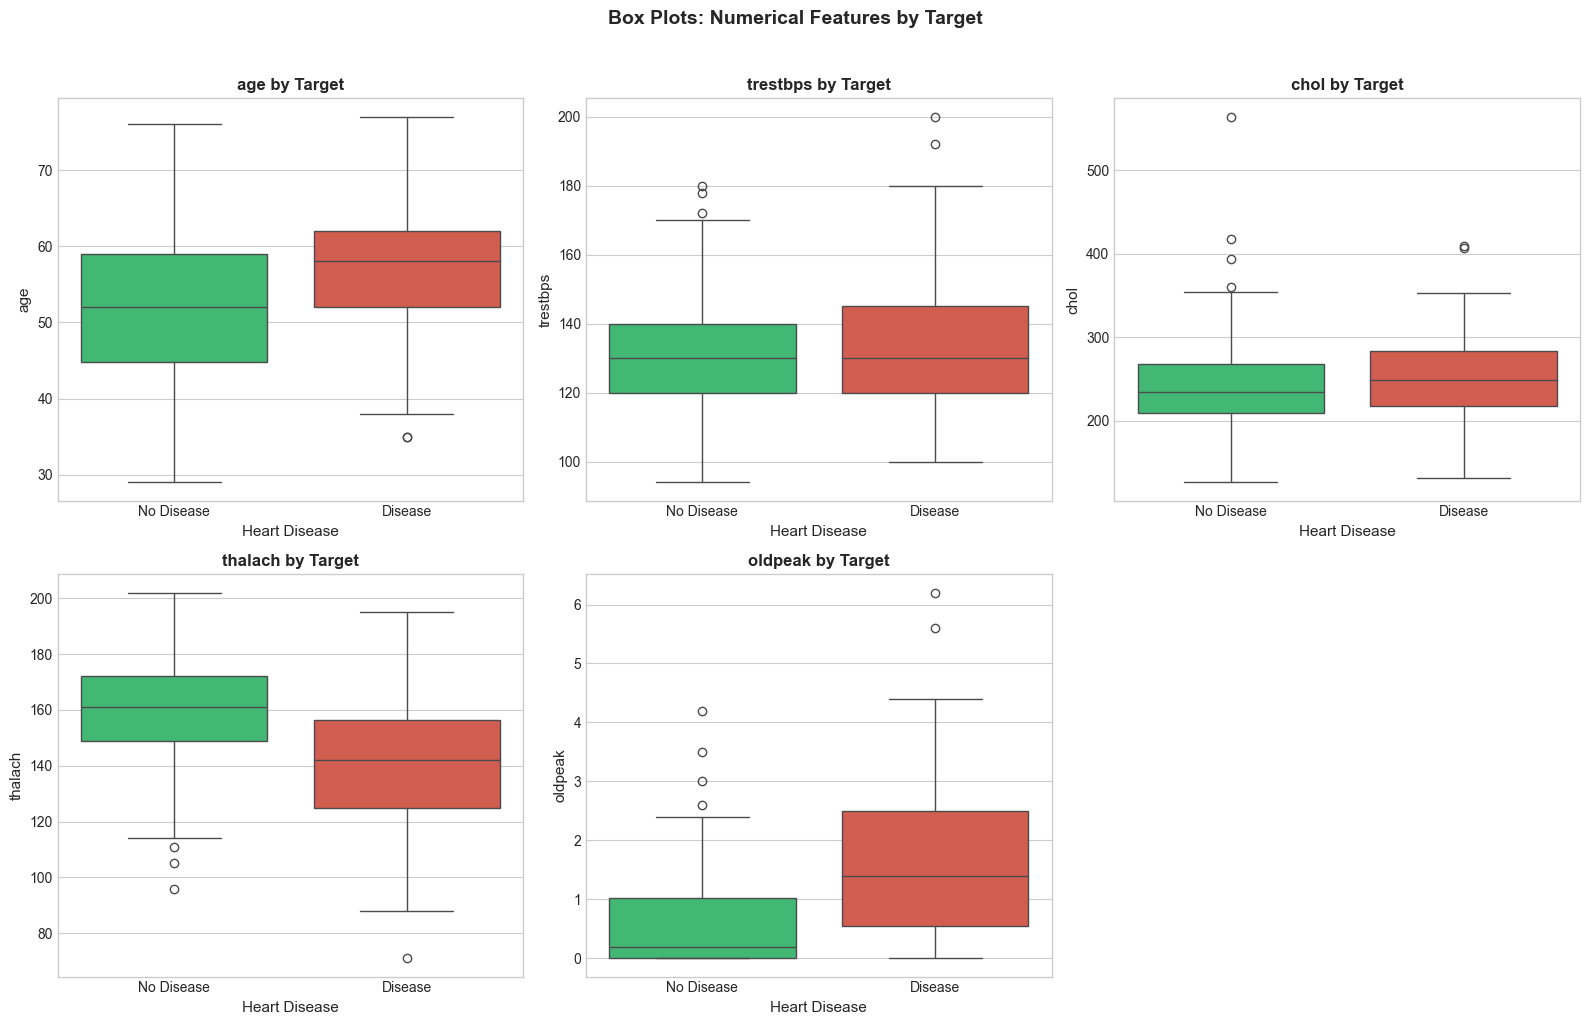

In [18]:
# Box plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, col in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(data=df, x='target', y=col, ax=ax, palette=['#2ecc71', '#e74c3c'])
    ax.set_xlabel('Heart Disease', fontsize=11)
    ax.set_ylabel(col, fontsize=11)
    ax.set_title(f'{col} by Target', fontsize=12, fontweight='bold')
    ax.set_xticklabels(['No Disease', 'Disease'])

axes[-1].set_visible(False)

plt.suptitle('Box Plots: Numerical Features by Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.5 Pair Plot (Feature Relationships)

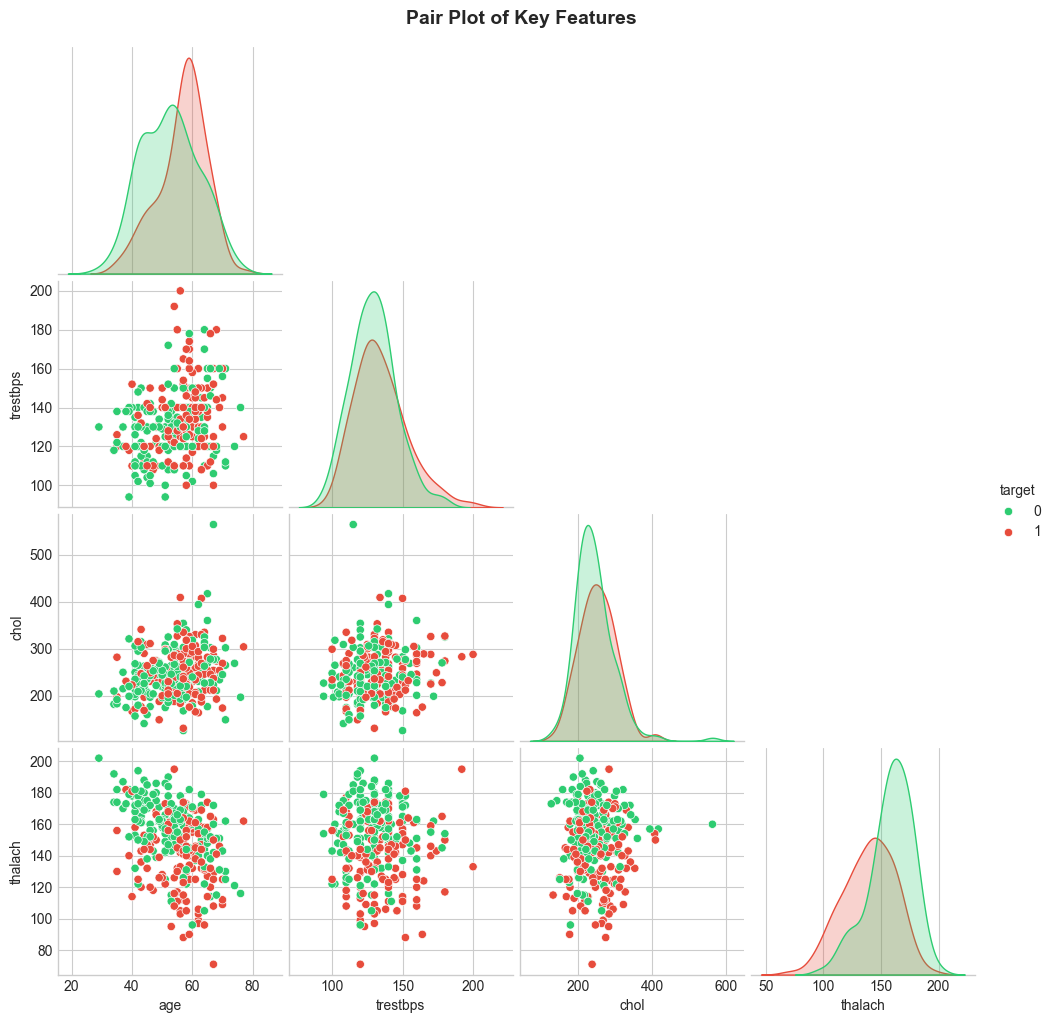

In [19]:
# Pair plot for key features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
g = sns.pairplot(df[key_features], hue='target', palette=['#2ecc71', '#e74c3c'],
                 diag_kind='kde', corner=True)
g.fig.suptitle('Pair Plot of Key Features', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('../screenshots/pairplot.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.6 Age and Gender Analysis

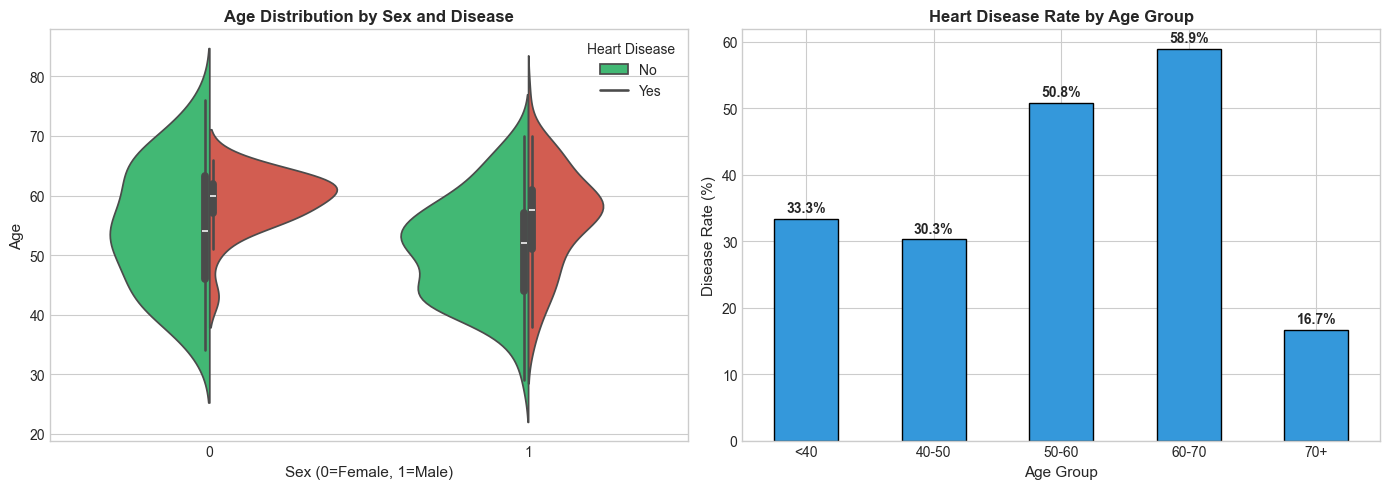

In [20]:
# Age distribution by gender and disease
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age by Sex
sns.violinplot(data=df, x='sex', y='age', hue='target', split=True, 
               ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Sex (0=Female, 1=Male)', fontsize=11)
axes[0].set_ylabel('Age', fontsize=11)
axes[0].set_title('Age Distribution by Sex and Disease', fontsize=12, fontweight='bold')
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])

# Disease rate by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 100], 
                         labels=['<40', '40-50', '50-60', '60-70', '70+'])
age_disease = df.groupby('age_group')['target'].mean() * 100
age_disease.plot(kind='bar', ax=axes[1], color='#3498db', edgecolor='black')
axes[1].set_xlabel('Age Group', fontsize=11)
axes[1].set_ylabel('Disease Rate (%)', fontsize=11)
axes[1].set_title('Heart Disease Rate by Age Group', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

# Add percentage labels
for i, v in enumerate(age_disease.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/age_gender_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Clean up
df.drop('age_group', axis=1, inplace=True)

## 4. Key EDA Findings Summary

In [21]:
# Summary Statistics
print("=" * 70)
print("EDA SUMMARY - KEY FINDINGS")
print("=" * 70)

print(f"\n📊 Dataset Overview:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: {df.shape[1] - 1}")
print(f"   • Target classes: 2 (Binary Classification)")

print(f"\n📈 Class Distribution:")
target_dist = df['target'].value_counts()
print(f"   • No Disease: {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
print(f"   • Disease: {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")
print(f"   • Balance: {'Relatively balanced' if abs(target_dist[0] - target_dist[1]) < len(df)*0.2 else 'Imbalanced'}")

print(f"\n🔗 Top Correlated Features with Target:")
top_corr = corr_matrix['target'].drop('target').abs().sort_values(ascending=False).head(5)
for feat, val in top_corr.items():
    print(f"   • {feat}: {val:.3f}")

print(f"\n🏥 Domain Insights:")
print(f"   • Chest pain type (cp) shows strong association with heart disease")
print(f"   • Maximum heart rate (thalach) negatively correlates with disease")
print(f"   • Exercise-induced angina (exang) is a significant indicator")
print(f"   • ST depression (oldpeak) shows positive correlation with disease")

print("\n" + "=" * 70)

EDA SUMMARY - KEY FINDINGS

📊 Dataset Overview:
   • Total samples: 303
   • Features: 13
   • Target classes: 2 (Binary Classification)

📈 Class Distribution:
   • No Disease: 164 (54.1%)
   • Disease: 139 (45.9%)
   • Balance: Relatively balanced

🔗 Top Correlated Features with Target:
   • thal: 0.522
   • ca: 0.460
   • exang: 0.432
   • oldpeak: 0.425
   • thalach: 0.417

🏥 Domain Insights:
   • Chest pain type (cp) shows strong association with heart disease
   • Maximum heart rate (thalach) negatively correlates with disease
   • Exercise-induced angina (exang) is a significant indicator
   • ST depression (oldpeak) shows positive correlation with disease



## 5. Save Cleaned Data

In [22]:
# Save cleaned dataset
import os
os.makedirs('../data/processed', exist_ok=True)

df.to_csv('../data/processed/heart_cleaned.csv', index=False)
print("✓ Cleaned dataset saved to '../data/processed/heart_cleaned.csv'")
print(f"  Shape: {df.shape}")

✓ Cleaned dataset saved to '../data/processed/heart_cleaned.csv'
  Shape: (303, 14)
